Title: Analysis of Attributes Relating to User Knowledge Levels In a DC Machine Dataset.

Introduction:

<li> Background Information </li>

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

<li> Statement of the Question We Wish to Answer </li>
Which 2 attributes out of the ones given (within the two groups as determined by their scales) are most correlated with user knowledge level and how are those attributes correlated amongst themselves? 
<br><br>

<li> Description of the Dataset </li>
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“very_low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



Preliminary exploratory data analysis:

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



<li> Demonstrate that the dataset can be read from the web into R </li>

In [2]:
user_knowledge_data <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,very_low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


<li> Clean and wrangle data into a tidy format </li>

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
user_knowledge_data_selected

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.000,0.00,0.00,0.00,very_low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,very_low
0.20,0.140,0.35,0.72,0.25,Low


<li> Summarize training data based on count of observations and average of each attribute </li>

In [4]:
user_knowledge_data_selected_summarize <- user_knowledge_data_selected %>% 
summarize(Count = n(), Average_STG = mean(STG), Average_SCG = mean(SCG), Average_STR = mean(STR), Average_LPR = mean(LPR), Average_PEG = mean(PEG))
user_knowledge_data_selected_summarize

Count,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
258,0.3711473,0.3556744,0.4680039,0.4327132,0.4585388


<li> Visualize training data </li>

In [5]:
user_knowledge_data_sum_g1 <- user_knowledge_data_selected %>%     
    group_by(UNS) %>% 
    summarize(Sum_STG = sum(STG), Sum_SCG = sum(SCG), Sum_STR = sum(STR))
user_knowledge_data_sum_g1

user_knowledge_data_sum_g2 <- user_knowledge_data_selected %>%     
    group_by(UNS) %>% 
    summarize(Sum_LPR = sum(LPR), Sum_PEG = sum(PEG))
user_knowledge_data_sum_g2

pivot_longer_g1 <- pivot_longer(user_knowledge_data_sum_g1, 
                                cols = Sum_STG : Sum_STR, 
                                names_to = "Attributes", 
                                values_to = "Sum_Values") 
                                

pivot_longer_g1       

pivot_longer_g2 <- pivot_longer(user_knowledge_data_sum_g2, 
                                cols = Sum_LPR : Sum_PEG, 
                                names_to = "Attributes", 
                                values_to = "Sum_Values")

pivot_longer_g2




`summarise()` ungrouping output (override with `.groups` argument)



UNS,Sum_STG,Sum_SCG,Sum_STR
<chr>,<dbl>,<dbl>,<dbl>
High,26.564,26.661,31.605
Low,26.655,27.971,35.750
Middle,35.198,32.377,44.600
very_low,7.339,4.755,8.790


`summarise()` ungrouping output (override with `.groups` argument)



UNS,Sum_LPR,Sum_PEG
<chr>,<dbl>,<dbl>
High,31.58,48.670
Low,41.28,19.723
Middle,30.17,47.730
very_low,8.61,2.180


UNS,Attributes,Sum_Values
<chr>,<chr>,<dbl>
High,Sum_STG,26.564
High,Sum_SCG,26.661
High,Sum_STR,31.605
Low,Sum_STG,26.655
Low,Sum_SCG,27.971
Low,Sum_STR,35.750
Middle,Sum_STG,35.198
Middle,Sum_SCG,32.377
Middle,Sum_STR,44.600


UNS,Attributes,Sum_Values
<chr>,<chr>,<dbl>
High,Sum_LPR,31.580
High,Sum_PEG,48.670
Low,Sum_LPR,41.280
Low,Sum_PEG,19.723
Middle,Sum_LPR,30.170
Middle,Sum_PEG,47.730
very_low,Sum_LPR,8.610
very_low,Sum_PEG,2.180


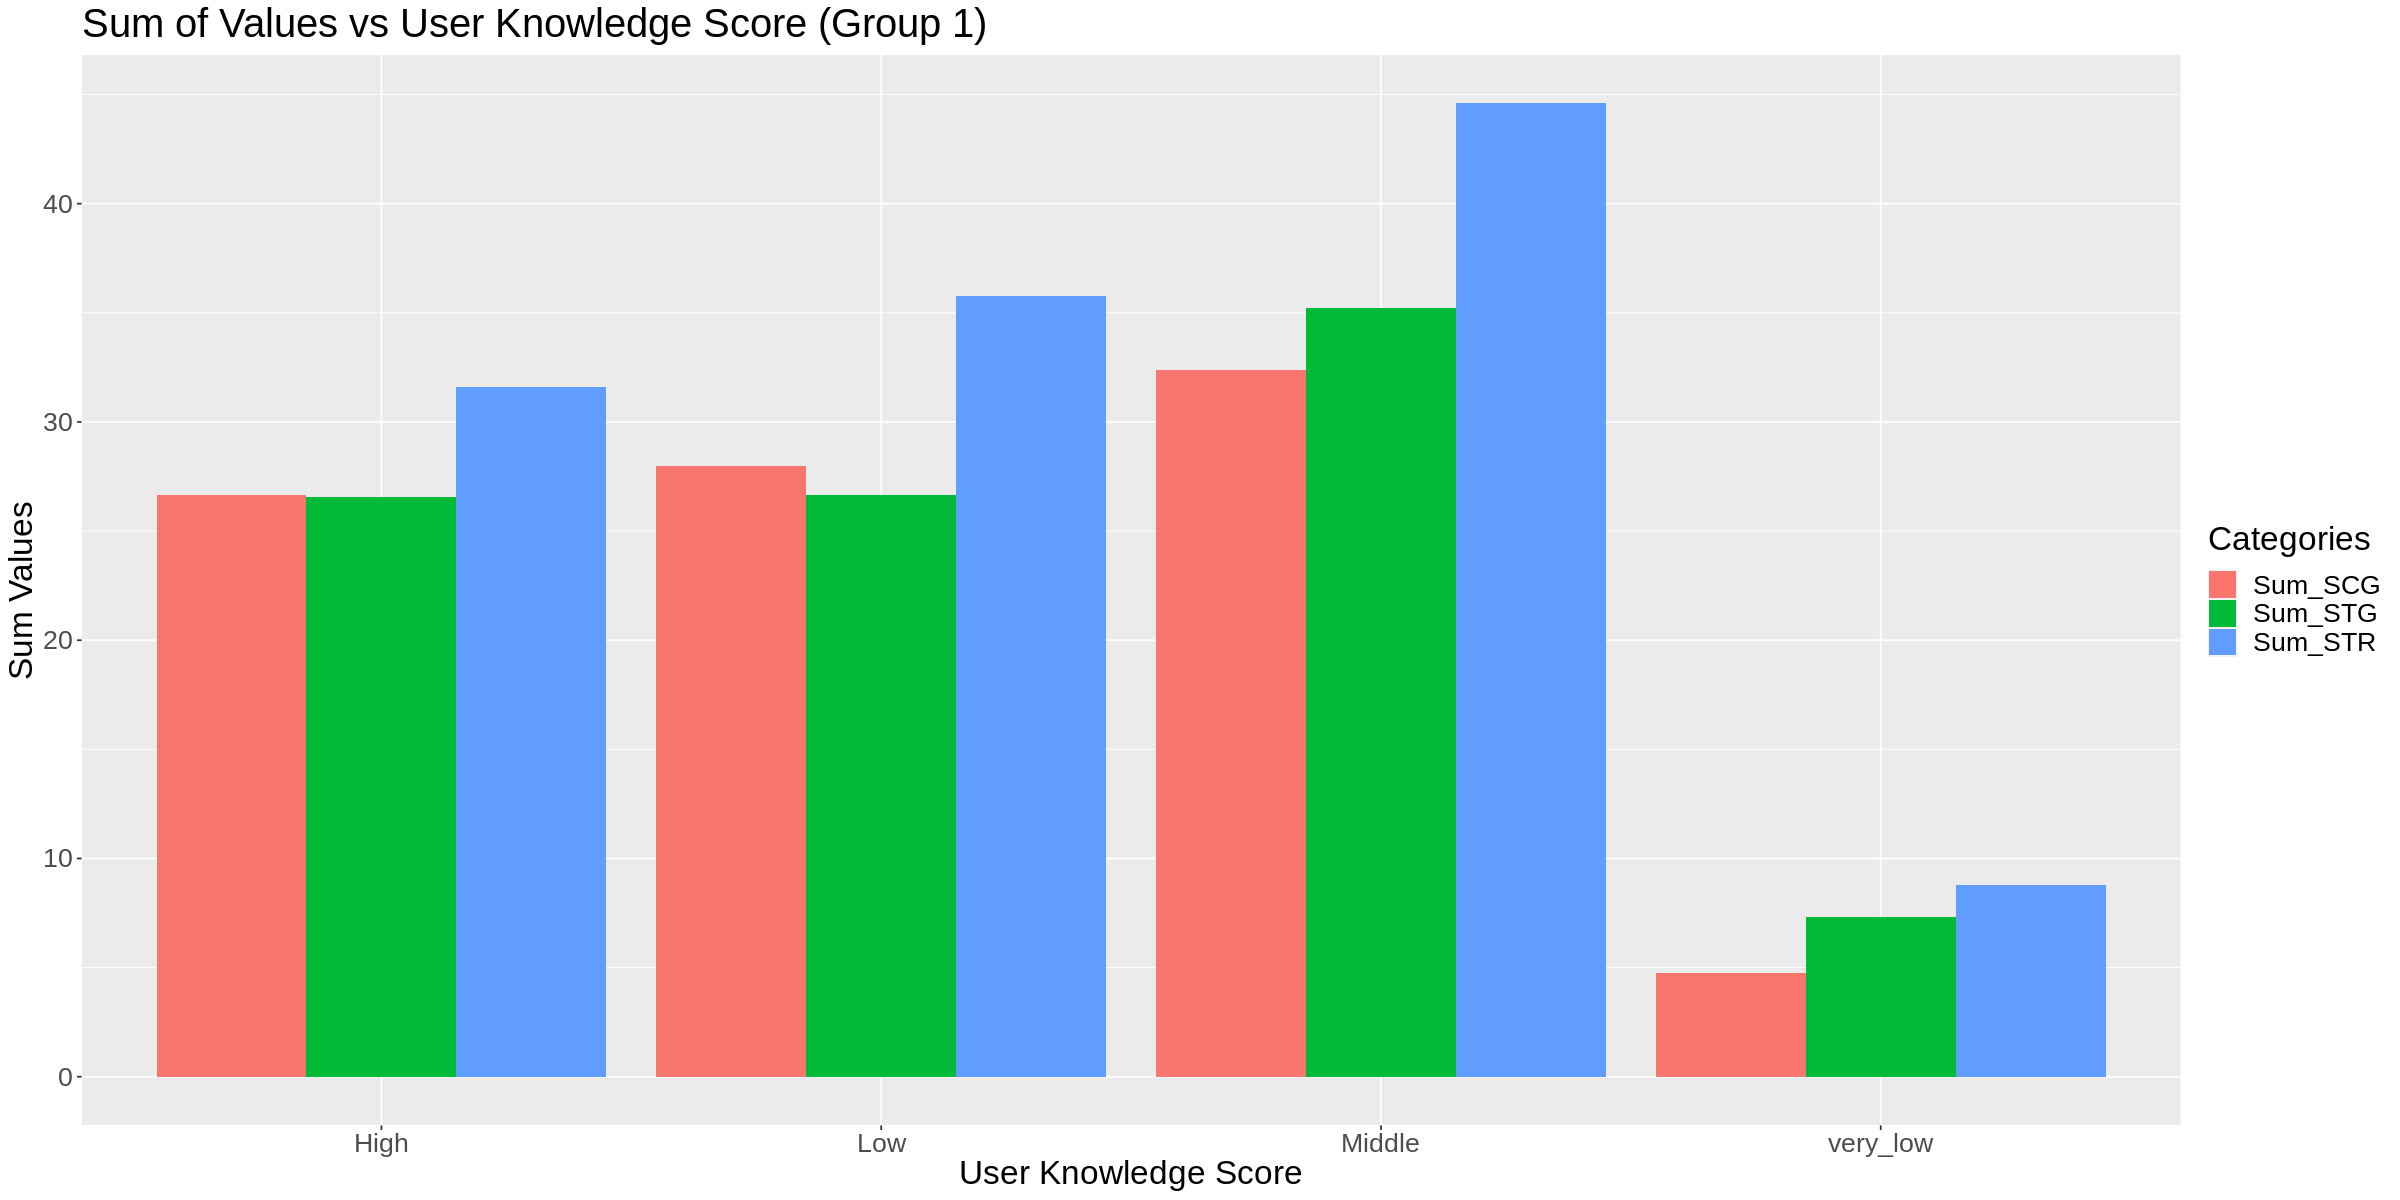

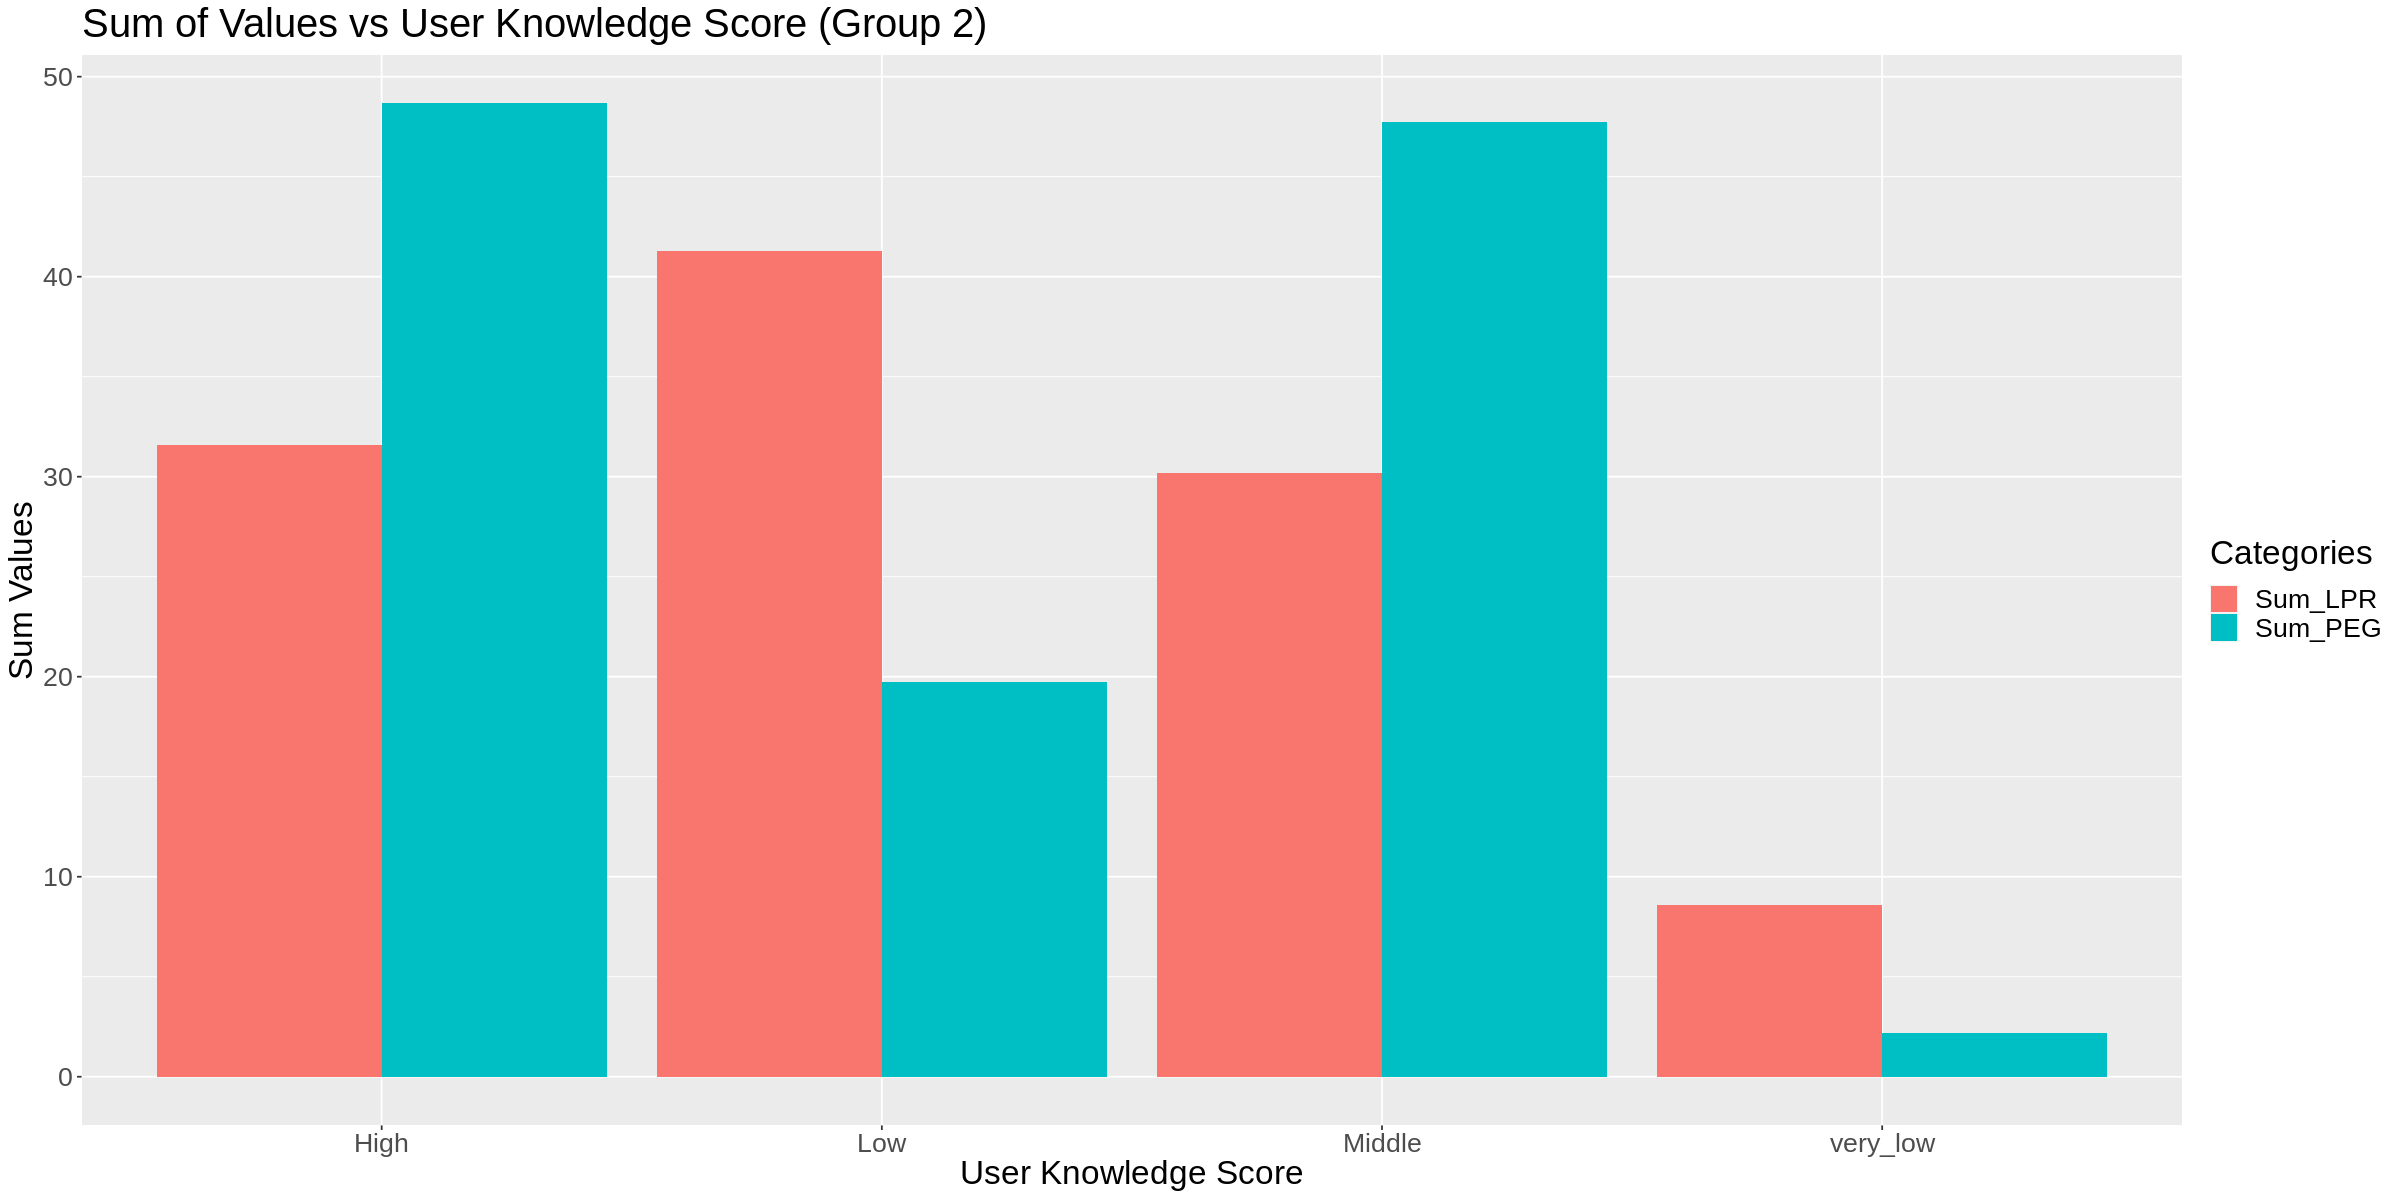

In [6]:
options(repr.plot.width = 20, repr.plot.height = 10) 
user_knowledge_g1_plot <- ggplot (pivot_longer_g1, aes(x= UNS, y= Sum_Values, fill= Attributes)) + 
                          geom_bar(stat = "identity", position = "dodge") +
                          labs(x = "User Knowledge Score", y = "Sum Values", fill = "Categories", title= "Sum of Values vs User Knowledge Score (Group 1)") + 
                          theme(text = element_text(size = 20)) 

user_knowledge_g1_plot

user_knowledge_g2_plot <- ggplot (pivot_longer_g2, aes(x= UNS, y= Sum_Values, fill= Attributes)) + 
                          geom_bar(stat = "identity", position = "dodge") +
                          labs(x = "User Knowledge Score", y = "Sum Values", fill = "Categories", title = "Sum of Values vs User Knowledge Score (Group 2)") + 
                          theme(text = element_text(size = 20)) 

user_knowledge_g2_plot

Methods: 

<li> Explain how you will conduct either your data analysis and which variables/columns you will use </li>
2 grouped bar plots will be created, user_knowledge_g1_plot for STG, SCG, STR and user_knowledge_g2_plot for LPR and PEG graphs. This is because the two groups use a different scale between them, with the sum of the column values on the y-axis and the 4 groups of knowledge levels of users (UNS) on the x-axis. Each colored bar corresponds with the sum of a category's value for the given knowledge level. The bar heights of the attributes within the high and middle knowledge level categories will be compared to visually evaluate and select for 1 attribute from each group (1 from STG, SCG, and STR, and 1 from LPR and PEG) that appears most closely linked to the two chosen knowledge levels, in the form of having the highest column heights in those two categories. 
<br><br>


<li> Describe at least one way that you will visualize the results </li>
A scatter plot to compare these two identified attributes will be made and the correlation strength and direction will be visually evaluated. 




<br><br>
Expected Outcomes and Significance:

<li> What we Expect to Find </li>
We expect to find two attributes that are the closest linked to a middle or high knowledge level and the correlation between the two implicated attributes. <br>

<li> Impact of our Findings </li>
The findings could be used to devise learning strategies and frameworks, within the field of electrical DC machines, that would prioritize the selected attributes to maximize user knowledge levels in a given period of time with greater efficiency. 
<br>

<li> Future Questions </li>
- Is the result consistent over similar domains of knowledge and technical fields? <br>
- What factors make the attribute closest linked to user knowledge level as such? <br>
- What attributes are the least linked and why? <br>
- What are the patterns in how different combinations of attributes affect knowledge level? <br>




<br><br>References: 

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe